<a href="https://colab.research.google.com/github/MarcosTorres978/Atividades_Aprofundamento_PLP/blob/main/5_COL_ARM_DAD_Trilha_2_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extraindo ano 2013
Resultado da requisição HTTP:  200
Extraindo ano 2014
Resultado da requisição HTTP:  200
Extraindo ano 2015
Resultado da requisição HTTP:  200
Extraindo ano 2016
Resultado da requisição HTTP:  200
Extraindo ano 2017
Resultado da requisição HTTP:  200
Extraindo ano 2018
Resultado da requisição HTTP:  200
Extraindo ano 2019
Resultado da requisição HTTP:  200
Extraindo ano 2020
Resultado da requisição HTTP:  200


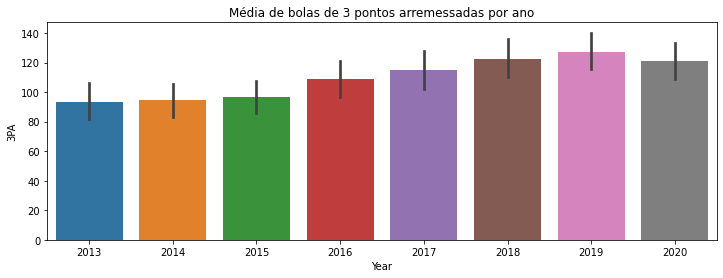

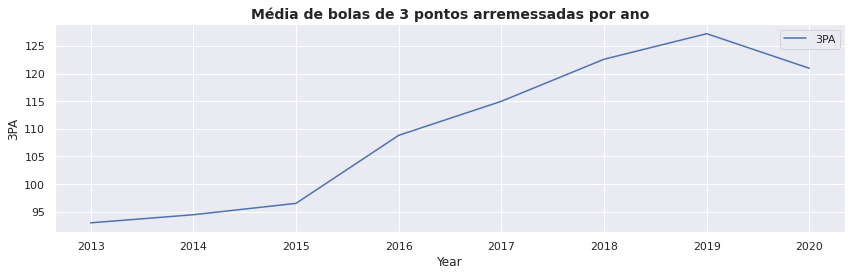


DF ordenado por bola de 3 pontos em ordem decrescente por ano
            Player   3P  Year
121  Stephen Curry  402  2016
165  Stephen Curry  354  2019
124  Stephen Curry  324  2017
267   James Harden  299  2020
140  Stephen Curry  286  2015

DF ordenado por bola de 3 pontos em ordem decrescente após agrupar por jogador


,Player,3P,3PA
121,Stephen Curry,402,886
165,Stephen Curry,354,810
124,Stephen Curry,324,789
267,James Harden,299,843
140,Stephen Curry,286,646


In [1]:
# data_exploration.py
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns

# Método para extrair várias páginas de uma só vez
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start, year_end + 1, 1)
    
    final_df = pd.DataFrame()
    
    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        print("Resultado da requisição HTTP: ", req.status_code)
        soup = bs(req.content, 'html.parser')
        # print(soup)
        table = soup.find(name='table', attrs={'id':'totals_stats'})
        df = pd.read_html(str(table))[0] # Declaração e uso do dataframe
        #df = pd.read_html(table_str)[0]
        df['Year'] = format(year)
        final_df = final_df.append(df)
    return final_df

# Utilizando o método criado
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

#print(df.head())

drop_indexes = df[df['Rk'] == 'Rk'].index # Seleciona indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # Elimina os valores do index selecionados na variável drop_indexes da tabela

# Convertendo tabelas para valores numéricos
numeric_cols = df.columns.drop(['Player','Pos','Tm'])  # Para entender a mudança, exibir os dados do dataframe antes e depois
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
#print(df.head())

#print('Formato: ', df.shape)
#print('Head: ',df.head())
#print('Tail: ', df.tail())
#display(df.shape)
#display(df.head())
#display(df.tail())
#print (df.columns.tolist())

# Gráfico de média de bolas de 3 pontos arremessadas por ano
#x = df.Year
#y = df.'3PA'
#sns.barplot(x='Year', y='3PA')
#sns.barplot(x, y)

plt.figure(figsize=(12,4))
sns.barplot(x='Year', y='3PA', data = df)
plt.title('Média de bolas de 3 pontos arremessadas por ano')
#plt.hlines(wine.price.mean(),-0.5,7.5,color='r',linestyles=':')
#plt.text(1, wine.price.mean() + 3, 'Média de Preço dos Vinhos Avaliados')
#plt.xticks(rotation=45)
plt.show()

# Pode ocorrer a mensagem "ValueError: cannot reindex from a duplicate axis" com colunas duplicadas.
# Para remover as colunas duplicadas, usar df.loc[:,~df.columns.duplicated()]
# Fonte https://stackoverflow.com/questions/60270081/valueerror-cannot-reindex-from-a-duplicate-axis-in-groupby-pandas
#print("Ini Duplicadas")
#print(df.columns.duplicated().any())
#print("Fim Duplicadas")

# Agrupando os dados por ano e somando os valores
# https://www.delftstack.com/howto/python-pandas/how-to-get-average-of-a-column-of-a-pandas-dataframe/
grouped_df_lineplot = df.groupby('Year', as_index=False).mean()
#print(grouped_df_lineplot.describe())
# Gráfico em linha usando a média dos dados (IMPORTANTE: SE NÃO FIZER GROUP BY DOS DADOS RETORNA "ValueError: cannot reindex from a duplicate axis")
#https://stackabuse.com/seaborn-line-plot-tutorial-and-examples/
plt.figure(figsize=(12,4))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="3PA", data=grouped_df_lineplot, label = '3PA')
plt.title('Média de bolas de 3 pontos arremessadas por ano', fontsize=14,weight='bold')
#plt.grid(bool,'both')
plt.legend()
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------

# Ordena Data Frame por bola de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Mostra 5 primeiras posições da tabela
print('\n\033[1mDF ordenado por bola de 3 pontos em ordem decrescente por ano\033[0m')
sorted_df[['Player','3P','Year']].head()
print(sorted_df[['Player','3P','Year']].head())

# Agrupando os dados por jogador e somando os valores
grouped_df = df.groupby('Player', as_index=False).sum()

# Ordena Data Frame por bolas de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# Mostra 5 primeiras posições da tabela
print('\n\033[1mDF ordenado por bola de 3 pontos em ordem decrescente após agrupar por jogador\033[0m')
sorted_df[['Player', '3P', '3PA']].head()